# City Day.csv

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [4]:
dataset = pd.read_csv('D:/Soumya/Soumya - IITKGP/Assignment2/city_day.csv')

In [5]:
df = dataset.copy()
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.rename(
    columns={"PM2.5":"PM25"}
          ,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM25        24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df.isnull().sum()

City              0
Date              0
PM25           4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Data Exploration

In [ ]:
# Let's see the possible best variables for modeling the AQI
sns.pairplot(df);

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix,annot=True,linewidths=.5)
plt.show()

In [ ]:
correlation_matrix.style.background_gradient()

# Data Cleaning

In [9]:
df.replace(to_replace=0.0,value=np.nan,inplace=True)

## Drop column Xylene as it has many null values

In [12]:
del df['Xylene']

## Drop null values

In [13]:
selected_columns=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI','AQI_Bucket']
df.dropna(axis = 0, how = 'any',inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5969 entries, 2123 to 29527
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        5969 non-null   object 
 1   Date        5969 non-null   object 
 2   PM25        5969 non-null   float64
 3   PM10        5969 non-null   float64
 4   NO          5969 non-null   float64
 5   NO2         5969 non-null   float64
 6   NOx         5969 non-null   float64
 7   NH3         5969 non-null   float64
 8   CO          5969 non-null   float64
 9   SO2         5969 non-null   float64
 10  O3          5969 non-null   float64
 11  Benzene     5969 non-null   float64
 12  Toluene     5969 non-null   float64
 13  AQI         5969 non-null   float64
 14  AQI_Bucket  5969 non-null   object 
dtypes: float64(12), object(3)
memory usage: 746.1+ KB


In [15]:
df.isnull().sum()

City          0
Date          0
PM25          0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [16]:
df = df.replace(np.nan, 0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5969 entries, 2123 to 29527
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        5969 non-null   object 
 1   Date        5969 non-null   object 
 2   PM25        5969 non-null   float64
 3   PM10        5969 non-null   float64
 4   NO          5969 non-null   float64
 5   NO2         5969 non-null   float64
 6   NOx         5969 non-null   float64
 7   NH3         5969 non-null   float64
 8   CO          5969 non-null   float64
 9   SO2         5969 non-null   float64
 10  O3          5969 non-null   float64
 11  Benzene     5969 non-null   float64
 12  Toluene     5969 non-null   float64
 13  AQI         5969 non-null   float64
 14  AQI_Bucket  5969 non-null   object 
dtypes: float64(12), object(3)
memory usage: 746.1+ KB


## Creating year and  month columns

In [18]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,year,month
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0,Moderate,2017,11
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0,Moderate,2017,11
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0,Moderate,2017,11
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0,Moderate,2017,11
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,173.0,Moderate,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29523,Visakhapatnam,2020-06-24,34.36,90.90,1.22,23.38,13.12,14.45,0.56,10.92,35.12,2.99,3.15,86.0,Satisfactory,2020,6
29524,Visakhapatnam,2020-06-25,13.45,58.54,2.30,21.60,13.09,12.27,0.41,8.19,29.38,1.28,5.64,77.0,Satisfactory,2020,6
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,47.0,Good,2020,6
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5969 entries, 2123 to 29527
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        5969 non-null   object        
 1   Date        5969 non-null   datetime64[ns]
 2   PM25        5969 non-null   float64       
 3   PM10        5969 non-null   float64       
 4   NO          5969 non-null   float64       
 5   NO2         5969 non-null   float64       
 6   NOx         5969 non-null   float64       
 7   NH3         5969 non-null   float64       
 8   CO          5969 non-null   float64       
 9   SO2         5969 non-null   float64       
 10  O3          5969 non-null   float64       
 11  Benzene     5969 non-null   float64       
 12  Toluene     5969 non-null   float64       
 13  AQI         5969 non-null   float64       
 14  AQI_Bucket  5969 non-null   object        
 15  year        5969 non-null   int64         
 16  month       5969 non

## Pair plots

In [ ]:
# setup figure
select=['PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Toluene' ]
fig, ax = plt.subplots(2,10, figsize=(50,10))

for i, var in enumerate(select):
  # Original data plots
  g= sns.scatterplot(data= df, x=var, y='AQI', color='blue', ax=ax[0][i])
  g.set_title(f'Original Scatter AQI vs. {var}')


In [17]:
select=['PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Toluene' ]

df[select].describe()

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene
count,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000
mean,60.611885,120.959462,16.883113,31.434684,32.179489,20.352701,0.992947,11.496497,35.573835,10.598650
std,53.633133,83.224288,20.186714,18.782927,27.368407,15.934020,1.377630,7.186797,19.299736,12.448222
min,2.000000,8.160000,0.250000,0.170000,0.170000,0.120000,0.010000,0.710000,1.550000,0.010000
25%,27.650000,66.350000,4.950000,15.650000,14.560000,10.330000,0.500000,6.550000,22.100000,2.310000
50%,46.570000,101.850000,9.870000,28.400000,24.080000,14.410000,0.730000,9.830000,32.170000,6.520000
75%,72.340000,147.200000,19.020000,43.210000,38.550000,27.580000,1.050000,14.350000,44.290000,13.430000
max,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,103.000000


## Understanding the distribution

In [ ]:
# The cities after cleaning
selected_cities=df.City.unique().tolist()
print('After cleaning the data, it has the following cities: ')
for city in selected_cities:
    print(city)

In [ ]:
df

In [ ]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
select=['PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Toluene' ]
pollutants=df[select].mean()
pollutantsdf=pollutants.to_frame().reset_index()
pollutantsdf.columns=['Pollutant','Level']

<!-- # Not required # Plotting the pollutants concentration percentage -->

## Pollutant concentration pie chart

In [ ]:
plt.figure(figsize=(11,8))

labels=pollutantsdf.Pollutant
explode=[0.1,0,0,0,0,0,0,0,0,0]

plt.title('Dominant Pollutants in India')
wedges,texts,autotexts=plt.pie(pollutantsdf.Level,explode=explode,autopct='%1.1f%%',shadow=True,startangle=0)
plt.axis('equal')
plt.legend(wedges, labels,
          title="Pollutants",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=14,weight='bold')
plt.show();

## Most Polluted city

In [ ]:
mean_df=df.groupby('City').mean()
mean_df

In [ ]:
plt.figure(figsize=(10,8))
plt.rc('figure',titlesize=20)
plt.rc('axes',titlesize=20)
sns.barplot(mean_df.index,mean_df.AQI)
plt.title('Most Polluted City')
plt.ylabel('AQI')
plt.xlabel('City')
plt.xticks(rotation=90);

## Plotting the city wise(for few pollutants) pollutant concentration against each year

In [ ]:
g = sns.FacetGrid(data= df, col="City",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"PM10")

In [ ]:
g = sns.FacetGrid(data= df, col="City",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"SO2",color = 'g')

In [ ]:
g = sns.FacetGrid(data= df, col="City",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"CO")

In [ ]:
g = sns.FacetGrid(data= df, col="City",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"PM25",color = 'g')

In [ ]:
g = sns.FacetGrid(data= df, col="City",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"AQI")

## Scatter Pairplots

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, x_vars = ['AQI'], y_vars=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene'],hue = 'City')
plt.show()

In [ ]:
#descriptive statistics of AQI
df['AQI'].describe()

## Distribution Plots

In [ ]:
# sns.distplot(data = df['PM10'],col = 'City');
g = sns.FacetGrid(df,col='City',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'PM10')

In [ ]:
g = sns.FacetGrid(df,col='City',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'PM25')

In [ ]:
g = sns.FacetGrid(df,col='City',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'AQI')

In [ ]:
g = sns.FacetGrid(df,col='City',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'SO2')

## Plotting AQI Bucket 

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM25', data=aqi_df,hue ='AQI_Bucket',palette = palette, ci= None)

# Prediction Model
## Dividing the Data into X and Y

In [494]:
# x=df[['PM25','PM10','NO2','NOx','CO','O3']]
x=df[['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']]
y=df['AQI']

In [495]:
x

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74
...,...,...,...,...,...,...,...,...,...
29523,34.36,90.90,1.22,23.38,13.12,14.45,0.56,10.92,35.12
29524,13.45,58.54,2.30,21.60,13.09,12.27,0.41,8.19,29.38
29525,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30


In [496]:
y

2123     184.0
2124     197.0
2125     198.0
2126     188.0
2127     173.0
         ...  
29523     86.0
29524     77.0
29525     47.0
29526     41.0
29527     70.0
Name: AQI, Length: 5969, dtype: float64

# Multiple Regression Model

In [554]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)

### Let's see the scatteplots now that we have removed the outliers

In [555]:
# # setup figure
# fig, ax = plt.subplots(2,9, figsize=(30,10))

# for i, var in enumerate(selected_columns):
#   # Original data plots
#   g= sns.scatterplot(data= df, x=var, y='AQI', color='blue', ax=ax[0][i])
#   g.set_title(f'Original Scatter AQI vs. {var}')


In [556]:
linreg=LinearRegression()

In [557]:
linreg.fit(xtrain, ytrain)

LinearRegression()

In [558]:
ypred=linreg.predict(xtest)

In [559]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,ypred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 91.72


# Model Evaluation

# Plot the Results

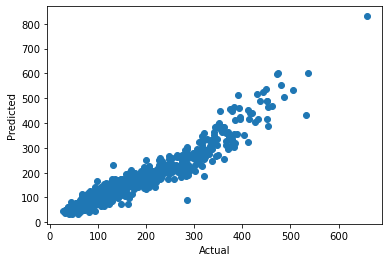

In [504]:
plt.scatter(ytest,ypred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model.

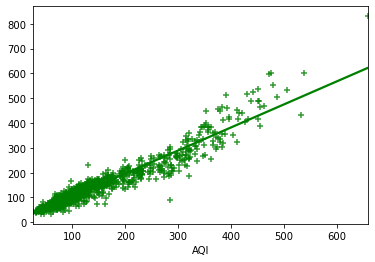

In [505]:
sns.regplot(x=ytest,y=ypred,ci=None, marker="+",color ='green');

# Regression model using statsmodel

In [532]:
import statsmodels.api as sm
#add constant to predictor variables
x1 = sm.add_constant(xtrain)

In [533]:
#fit linear regression model
model = sm.OLS(ytrain, x1).fit()

In [534]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     4669.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:01:13   Log-Likelihood:                -19737.
No. Observations:                4178   AIC:                         3.949e+04
Df Residuals:                    4168   BIC:                         3.956e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6328      1.170     12.502      0.0

In [535]:
# from sklearn.metrics import accuracy_score
# accuracy_score(ytest, ypred)

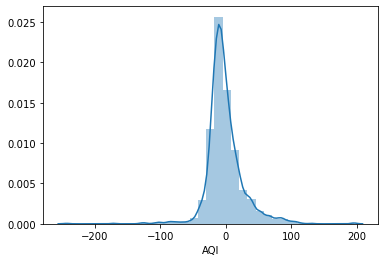

In [536]:
sns.distplot((ytest-ypred),bins=35)

## Predicted Values

In [537]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':ypred,'Difference':ytest-ypred})
pred_df

,Actual Value,Predicted Value,Difference
15556,79.0,71.118539,7.881461
4068,322.0,261.915807,60.084193
29458,47.0,43.580888,3.419112
3061,55.0,66.058878,-11.058878
14069,134.0,127.667370,6.332630
...,...,...,...
16575,52.0,67.692871,-15.692871
28969,61.0,40.672221,20.327779
16040,133.0,159.538159,-26.538159
29306,152.0,159.457371,-7.457371


# Decision Tree Model

In [560]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse')
tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [561]:
tree_pred = tree.predict(xtest)

In [562]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,tree_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.19


## Plot the Results

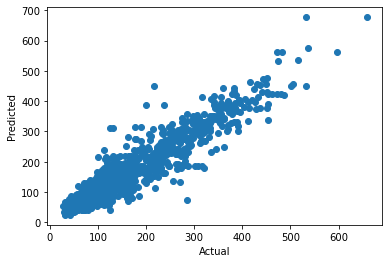

In [465]:
plt.scatter(ytest,tree_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model.

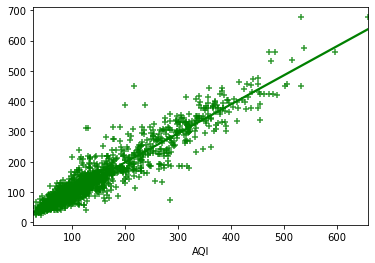

In [466]:
sns.regplot(x=ytest,y=tree_pred,ci=None, marker="+",color ='green');

## Actual and Predicted data frame

In [467]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':tree_pred,'Difference':ytest-tree_pred})
pred_df

,Actual Value,Predicted Value,Difference
15556,79.0,75.0,4.0
4068,322.0,308.0,14.0
29458,47.0,73.0,-26.0
3061,55.0,61.0,-6.0
14069,134.0,216.0,-82.0
...,...,...,...
16575,52.0,50.0,2.0
28969,61.0,73.0,-12.0
16040,133.0,142.0,-9.0
29306,152.0,105.0,47.0


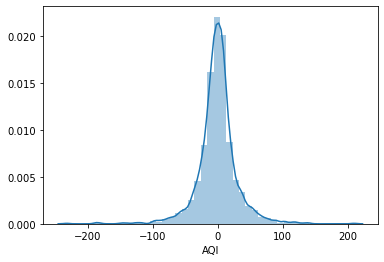

In [468]:
sns.distplot((ytest - tree_pred),bins=45)

# KNN REGRESSOR

In [563]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=1)

In [564]:
knn_pred = knn.predict(xtest)

## Accuracy of the model

In [565]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,knn_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.29


# Plot the Results

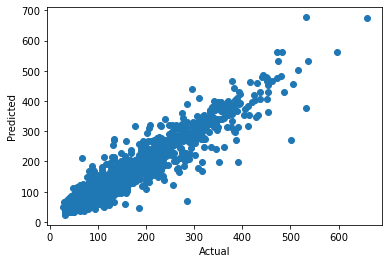

In [472]:
plt.scatter(ytest,knn_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model.

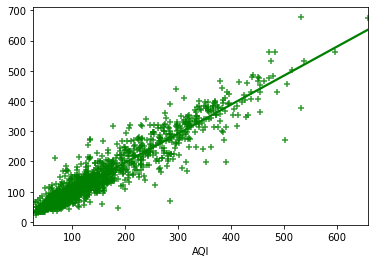

In [473]:
sns.regplot(x=ytest,y=knn_pred,ci=None, marker="+",color ='green');

## Actual and Predicted data frame

In [474]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':knn_pred,'Difference':ytest-knn_pred})
pred_df

,Actual Value,Predicted Value,Difference
15556,79.0,95.0,-16.0
4068,322.0,334.0,-12.0
29458,47.0,36.0,11.0
3061,55.0,63.0,-8.0
14069,134.0,128.0,6.0
...,...,...,...
16575,52.0,60.0,-8.0
28969,61.0,68.0,-7.0
16040,133.0,141.0,-8.0
29306,152.0,176.0,-24.0


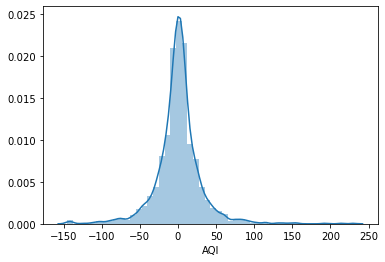

In [475]:
sns.distplot(ytest - knn_pred)

In [476]:
# from sklearn import metrics
# print(f"Mean Abs Error: {metrics.mean_absolute_error(ytest, pred)}")
# print(f"Mean Sq Error: {metrics.mean_squared_error(ytest, pred)}")
# print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(ytest, pred))}")

# Lasso Regressor

In [566]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [567]:
lasso_pred = lassoReg.predict(xtest)

## Accuracy of the model

In [568]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,lasso_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 91.72


## Plot the Results

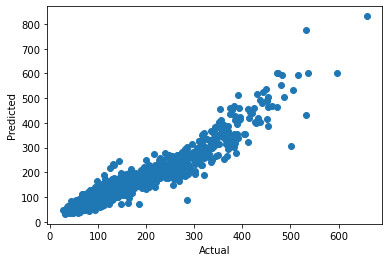

In [480]:
plt.scatter(ytest,lasso_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model

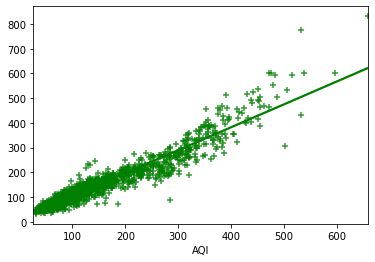

In [481]:
sns.regplot(x=ytest,y=lasso_pred,ci=None, marker="+",color ='green');

## Actual and Predicted data frame

In [482]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':lasso_pred,'Difference':ytest-lasso_pred})
pred_df

,Actual Value,Predicted Value,Difference
15556,79.0,71.263995,7.736005
4068,322.0,261.899320,60.100680
29458,47.0,43.694949,3.305051
3061,55.0,65.987565,-10.987565
14069,134.0,127.775942,6.224058
...,...,...,...
16575,52.0,67.762281,-15.762281
28969,61.0,40.844601,20.155399
16040,133.0,159.602207,-26.602207
29306,152.0,159.564674,-7.564674


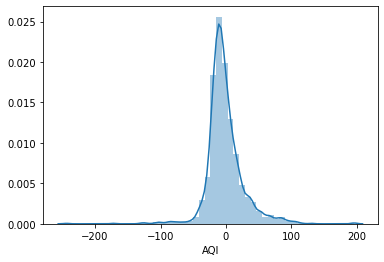

In [483]:
sns.distplot(ytest - lasso_pred)

In [484]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(ytest, lasso_pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(ytest, lasso_pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(ytest, lasso_pred))}")

Mean Abs Error: 18.909329231302817
Mean Sq Error: 782.4466739666644
Root Mean Error: 27.97224828230052


# RANDOM FOREST REGRESSOR

In [569]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [570]:
forest_pred = forest.predict(xtest)

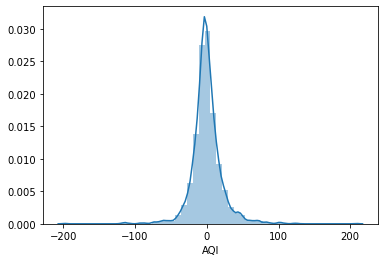

In [571]:
sns.distplot(ytest - forest_pred)

In [572]:
### Accuracy of the model

In [573]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,forest_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 94.79


In [552]:
### Plot the Results

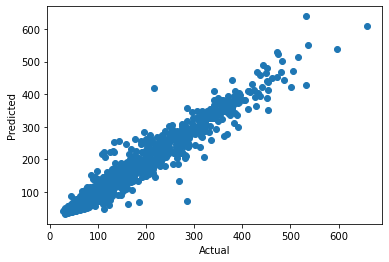

In [553]:
plt.scatter(ytest,forest_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model

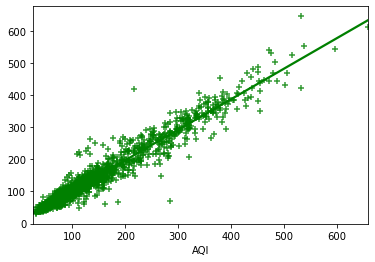

In [492]:
sns.regplot(x=ytest,y=forest_pred,ci=None, marker="+",color ='green');

## Actual and Predicted data frame

In [493]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':forest_pred,'Difference':ytest-forest_pred})
pred_df

,Actual Value,Predicted Value,Difference
15556,79.0,76.60,2.40
4068,322.0,321.50,0.50
29458,47.0,53.49,-6.49
3061,55.0,62.82,-7.82
14069,134.0,144.00,-10.00
...,...,...,...
16575,52.0,64.41,-12.41
28969,61.0,55.66,5.34
16040,133.0,147.37,-14.37
29306,152.0,138.55,13.45
